# Colour - HDRI - Examples: Variance Minimization Light Probe Sampling

Through this example, lights will be extracted from radiance images using Viriyothai (2009) variance minimization light probe sampling algorithm.

> Note: The current implementation is not entirely vectorised nor optimised thus slow.

In [1]:
%matplotlib inline

In [2]:
from __future__ import division

import matplotlib.pyplot as plt
import os
from pprint import pprint

import colour
from colour.plotting import *

from colour_hdri import (
    EXAMPLES_RESOURCES_DIRECTORY,
    light_probe_sampling_variance_minimization_Viriyothai2009)
from colour_hdri.sampling.variance_minimization import (
    find_regions_variance_minimization_Viriyothai2009,
    highlight_regions_variance_minimization)


OETF = colour.OETFS['sRGB']

RESOURCES_DIRECTORY = os.path.join(EXAMPLES_RESOURCES_DIRECTORY,
                                   'radiance')

plt.style.use(colour_style())

colour.utilities.describe_environment();

*                                                                             *
*   Interpreter :                                                             *
*       python : 2.7.14 | packaged by conda-forge | (default, Dec 25 2017,    *
*   01:18:54)                                                                 *
*                [GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]     *
*                                                                             *
*   colour-science.org :                                                      *
*       colour : v0.3.11-617-g49ee5730                                        *
*       colour-hdri : v0.1.4-38-gaffd13f                                      *
*                                                                             *
*   Runtime :                                                                 *
*       numpy : 1.15.4                                                        *
*       scipy : 1.1.0                   

## Regions

  File "/Users/kelsolaar/Documents/Development/colour-science/colour-hdri/colour_hdri/sampling/variance_minimization.py", line 122, in find_regions_variance_minimization_Viriyothai2009
    luminance_variance(a[y_min:y_max, x_min:j]),
  File "/Users/kelsolaar/Documents/Development/colour-science/colour-hdri/colour_hdri/sampling/variance_minimization.py", line 81, in luminance_variance
    x_centroid, y_centroid = centroid(a)
/Users/kelsolaar/Documents/Development/colour-science/colour/colour/utilities/array.py:846: RuntimeWarning: invalid value encountered in double_scalars
  a_ci.append(np.sum(axis * a) // a_s)


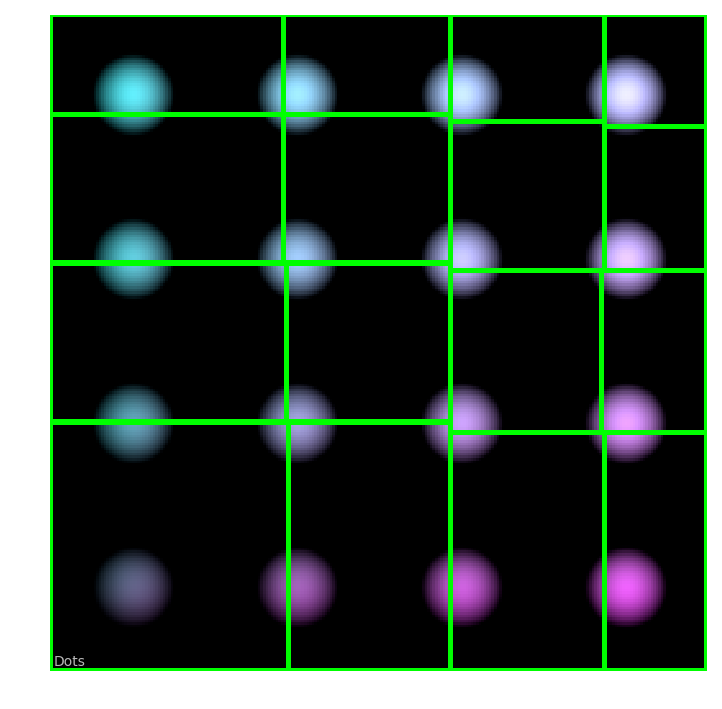

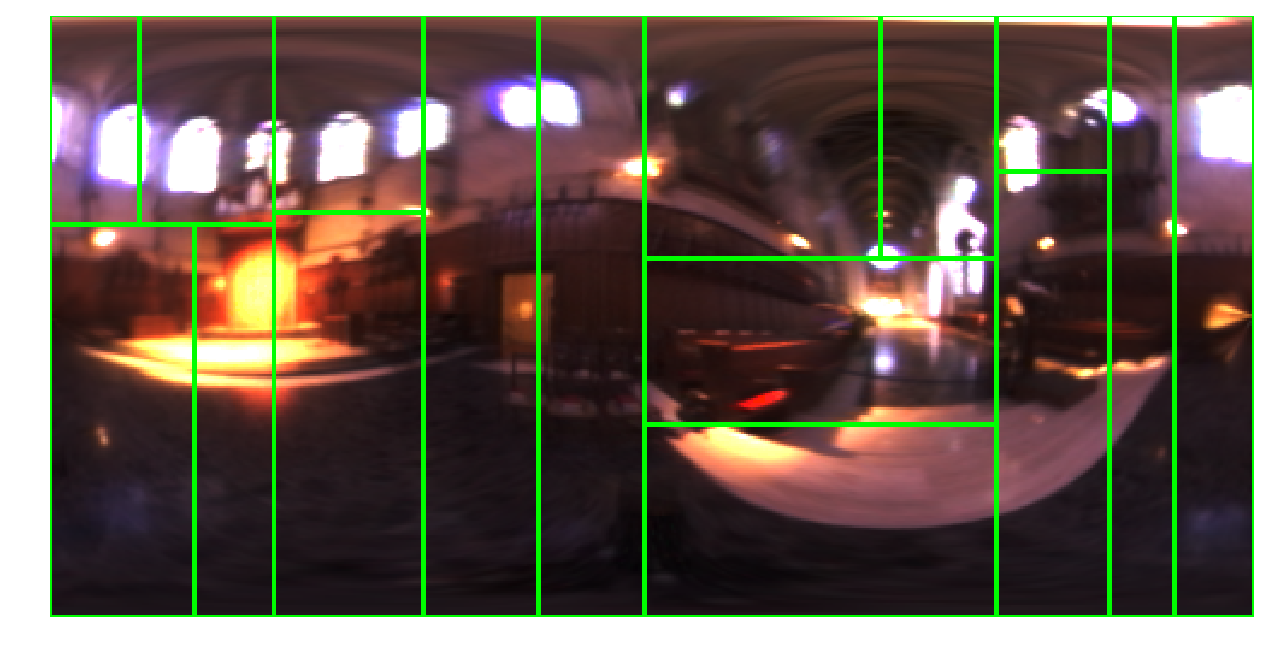

In [3]:
HDRI_IMAGE1 = colour.read_image(os.path.join(RESOURCES_DIRECTORY, 'Dots.exr'))

HDRI_IMAGE2 = colour.read_image(os.path.join(RESOURCES_DIRECTORY, 'Grace_Cathedral.hdr'))

Y1 = colour.RGB_luminance(
        HDRI_IMAGE1,
        colour.models.sRGB_COLOURSPACE.primaries,
        colour.models.sRGB_COLOURSPACE.whitepoint)
regions1 = find_regions_variance_minimization_Viriyothai2009(Y1)

Y2 = colour.RGB_luminance(
        HDRI_IMAGE2,
        colour.models.sRGB_COLOURSPACE.primaries,
    colour.models.sRGB_COLOURSPACE.whitepoint)
regions2 = find_regions_variance_minimization_Viriyothai2009(Y2)

plot_image(OETF(highlight_regions_variance_minimization(
            HDRI_IMAGE1,
            regions1)), {'text': 'Dots'})

plot_image(OETF(highlight_regions_variance_minimization(
            HDRI_IMAGE2,
            regions2)), {'test': 'Grace Cathedral'});

## Lights

In [4]:
print('Dots - 16 Lights')
pprint(light_probe_sampling_variance_minimization_Viriyothai2009(
           HDRI_IMAGE1, 16))

print('\n')

print('Grace Cathedral - 32 Lights')
pprint(light_probe_sampling_variance_minimization_Viriyothai2009(
           HDRI_IMAGE2, 32))

Dots - 16 Lights
[Light_Specification(uv=array([ 0.16015625,  0.11328125]), colour=array([  40.65992016,  226.11660475,  266.78098774]), index=array([29, 41])),
 Light_Specification(uv=array([ 0.15625   ,  0.32421875]), colour=array([  30.73776919,  130.37145448,  161.1077342 ]), index=array([83, 40])),
 Light_Specification(uv=array([ 0.4296875 ,  0.11328125]), colour=array([  98.10281688,  201.29676312,  299.4054991 ]), index=array([ 29, 110])),
 Light_Specification(uv=array([ 0.4296875,  0.3203125]), colour=array([  74.89445847,  117.00525796,  191.89859456]), index=array([ 82, 110])),
 Light_Specification(uv=array([ 0.16796875,  0.484375  ]), colour=array([  42.24291545,  125.58142895,  167.82099468]), index=array([124,  43])),
 Light_Specification(uv=array([ 0.43359375,  0.484375  ]), colour=array([  90.15780473,  102.82409275,  192.97436064]), index=array([124, 111])),
 Light_Specification(uv=array([ 0.18359375,  0.7421875 ]), colour=array([  82.1725328 ,   97.55175847,  179.72394

  File "<ipython-input-4-235aeef6d643>", line 9, in <module>
    HDRI_IMAGE2, 32))
  File "/Users/kelsolaar/Documents/Development/colour-science/colour-hdri/colour_hdri/sampling/variance_minimization.py", line 221, in light_probe_sampling_variance_minimization_Viriyothai2009
    format(lights_count, iterations ** 2))
/Users/kelsolaar/Documents/Development/colour-science/colour/colour/utilities/verbose.py:221: ColourWarning: 32 lights requested, 25 will be effectively computed!
  warn(*args, **kwargs)


[Light_Specification(uv=array([ 0.016,  0.196]), colour=array([ 1737.94824219,  1340.39746094,  2991.25292969]), index=array([49,  8])),
 Light_Specification(uv=array([ 0.06,  0.22]), colour=array([  4932.79736328,   4677.75732422,  10582.44873047]), index=array([55, 30])),
 Light_Specification(uv=array([ 0.1  ,  0.232]), colour=array([ 3534.47290039,  2863.27978516,  4447.44165039]), index=array([58, 50])),
 Light_Specification(uv=array([ 0.136,  0.232]), colour=array([ 2676.72607422,  1950.38256836,  2374.09399414]), index=array([58, 68])),
 Light_Specification(uv=array([ 0.06 ,  0.412]), colour=array([ 1578.71356201,   656.52148438,   349.82165527]), index=array([103,  30])),
 Light_Specification(uv=array([ 0.096,  0.58 ]), colour=array([ 2525.62277222,  1030.9206543 ,   255.17736816]), index=array([145,  48])),
 Light_Specification(uv=array([ 0.166,  0.46 ]), colour=array([ 7535.69287109,  1403.37402344,   147.95703125]), index=array([115,  83])),
 Light_Specification(uv=array([ 0.